Tutorial of different types of calendar supported in `s2s` package.

In [18]:
import numpy as np
import pandas as pd
import s2spy.time

Tutorial of `MonthlyCalendar` module in `s2s` package.

Create MonthlyCalendar instance.

In [19]:
calendar = s2spy.time.MonthlyCalendar(anchor="04-12", freq='2M', n_targets=1)
calendar

s2spy.time.MonthlyCalendar(
    anchor='04-12',
    freq='2M',
    n_targets=1,
    max_lag=0,
    allow_overlap=False,
    mapping=None
)

Map the calendar to years.

In [20]:
calendar = calendar.map_years(2020, 2021)
calendar.show()

i_interval,-5,-4,-3,-2,-1,1
anchor_year,,,,,,
2021,"[2020 Jun, 2020 Aug)","[2020 Aug, 2020 Oct)","[2020 Oct, 2020 Dec)","[2020 Dec, 2021 Feb)","[2021 Feb, 2021 Apr)","[2021 Apr, 2021 Jun)"
2020,"[2019 Jun, 2019 Aug)","[2019 Aug, 2019 Oct)","[2019 Oct, 2019 Dec)","[2019 Dec, 2020 Feb)","[2020 Feb, 2020 Apr)","[2020 Apr, 2020 Jun)"


Tutorial of `WeeklyCalendar` module in `s2s` package.

Create WeeklyCalendar instance.

In [21]:
calendar = s2spy.time.WeeklyCalendar(anchor="W10", freq='3W', n_targets=1)
calendar

s2spy.time.WeeklyCalendar(
    anchor='W10-1',
    freq='3W',
    n_targets=1,
    max_lag=0,
    allow_overlap=False,
    mapping=None
)

Map the calendar to years.

In [22]:
calendar = calendar.map_years(2020, 2021)
calendar.show()

i_interval,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,1
anchor_year,,,,,,,,,,,,,,,,,
2021,"[2020-W14, 2020-W17)","[2020-W17, 2020-W20)","[2020-W20, 2020-W23)","[2020-W23, 2020-W26)","[2020-W26, 2020-W29)","[2020-W29, 2020-W32)","[2020-W32, 2020-W35)","[2020-W35, 2020-W38)","[2020-W38, 2020-W41)","[2020-W41, 2020-W44)","[2020-W44, 2020-W47)","[2020-W47, 2020-W50)","[2020-W50, 2021-W01)","[2021-W01, 2021-W04)","[2021-W04, 2021-W07)","[2021-W07, 2021-W10)","[2021-W10, 2021-W13)"
2020,"[2019-W14, 2019-W17)","[2019-W17, 2019-W20)","[2019-W20, 2019-W23)","[2019-W23, 2019-W26)","[2019-W26, 2019-W29)","[2019-W29, 2019-W32)","[2019-W32, 2019-W35)","[2019-W35, 2019-W38)","[2019-W38, 2019-W41)","[2019-W41, 2019-W44)","[2019-W44, 2019-W47)","[2019-W47, 2019-W50)","[2019-W50, 2020-W01)","[2020-W01, 2020-W04)","[2020-W04, 2020-W07)","[2020-W07, 2020-W10)","[2020-W10, 2020-W13)"


Tutorial of `Calendar` module in `s2s` package.

Create Calendar instance.

In [23]:
# create custom calendar
calendar = s2spy.time.Calendar(anchor="12-31")
print(calendar)

s2spy.time.Calendar(
    anchor='12-31',
    allow_overlap=False,
    mapping=None,
    intervals=None
)


Add target and precursor interval "building blocks" one by one to the calendar.

In [24]:
# add target periods
calendar.add_interval("target", length="20d")
calendar.add_interval("target", length="20d", gap="10d")  # You can add gaps between intervals

# add precursor periods
calendar.add_interval("precursor", "10d", "-5d")  # The gap can be negative, leading to overlap
calendar.add_interval("precursor", "2W")  # Lengths can also be weeks, or months
calendar.add_interval("precursor", "1M")

In [28]:
calendar = s2spy.time.AdventCalendar(anchor="11-30", freq='180d')
calendar = calendar.map_years(2020, 2021)
calendar.show()

i_interval,-1,1
anchor_year,,
2021,"[2021-06-03, 2021-11-30)","[2021-11-30, 2022-05-29)"
2020,"[2020-06-03, 2020-11-30)","[2020-11-30, 2021-05-29)"


Map the calendar to multiple years (start year - end year).

In [29]:
calendar = calendar.map_years(2020, 2022)
calendar.show()

i_interval,-1,1
anchor_year,,
2022,"[2022-06-03, 2022-11-30)","[2022-11-30, 2023-05-29)"
2021,"[2021-06-03, 2021-11-30)","[2021-11-30, 2022-05-29)"
2020,"[2020-06-03, 2020-11-30)","[2020-11-30, 2021-05-29)"


The calendar can also be displayed in a plot, using `.visualize()`.

This makes it easier to look at calendars containing more intervals:

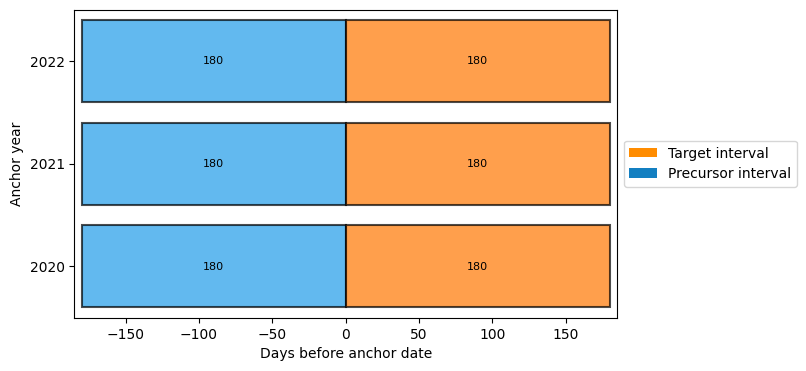

In [30]:
calendar.visualize(relative_dates=True, show_length=True)

Map the calendar to the input data.

In [31]:
# create dummy data for testing
time_index = pd.date_range('20171110', '20211211', freq='10d')
var = np.random.random(len(time_index))
# generate input data
test_data = pd.Series(var, index=time_index)
# map year to data
calendar = calendar.map_to_data(test_data)
calendar.show()

i_interval,-1,1
anchor_year,,
2020,"[2020-06-03, 2020-11-30)","[2020-11-30, 2021-05-29)"
2019,"[2019-06-03, 2019-11-30)","[2019-11-30, 2020-05-28)"
2018,"[2018-06-03, 2018-11-30)","[2018-11-30, 2019-05-29)"
2017,"[2017-06-03, 2017-11-30)","[2017-11-30, 2018-05-29)"
